# Understanding India

### Sync Death/Active/Recovered cases' rows

<br /><br />

In [110]:
# Setting the working directory
setwd("~/Documents/COVID-19-India/before-lockdown/")

In [111]:
#library(ggplot2)   # gg menns ->   grammer of graphics
library(tidyverse)
library(stringr)
library(lattice)
library(plyr) # used to calculate the average weight of each group 

In [112]:
growth = read.csv("ready_to_use/India_Aggregate_summary.csv")
india = read.csv("ready_to_use/India_Aggregate_dateWise_summary.csv")

india$Day = as.factor(india$Day)
class(india$Day)

[1] "factor"

In [113]:
head(india)

Country,Date,Day,Confirmed,New.Cases,Doubles.In,Deaths,Recovered,Active.Cases,Closed.Cases,Death.Rate
India,30/01/2020,1,1,1,0,0,0,1,0,0
India,31/01/2020,2,1,0,0,0,0,1,0,0
India,01/02/2020,3,2,1,2,0,0,2,0,0
India,02/02/2020,4,3,1,1,0,0,3,0,0
India,03/02/2020,5,3,0,2,0,0,3,0,0
India,04/02/2020,6,3,0,3,0,0,3,0,0


<br /><br />

In [114]:
options(repr.plot.width=16, repr.plot.height=8)

## Line Graplas

### Confirmed (cumulative) Cases over the days

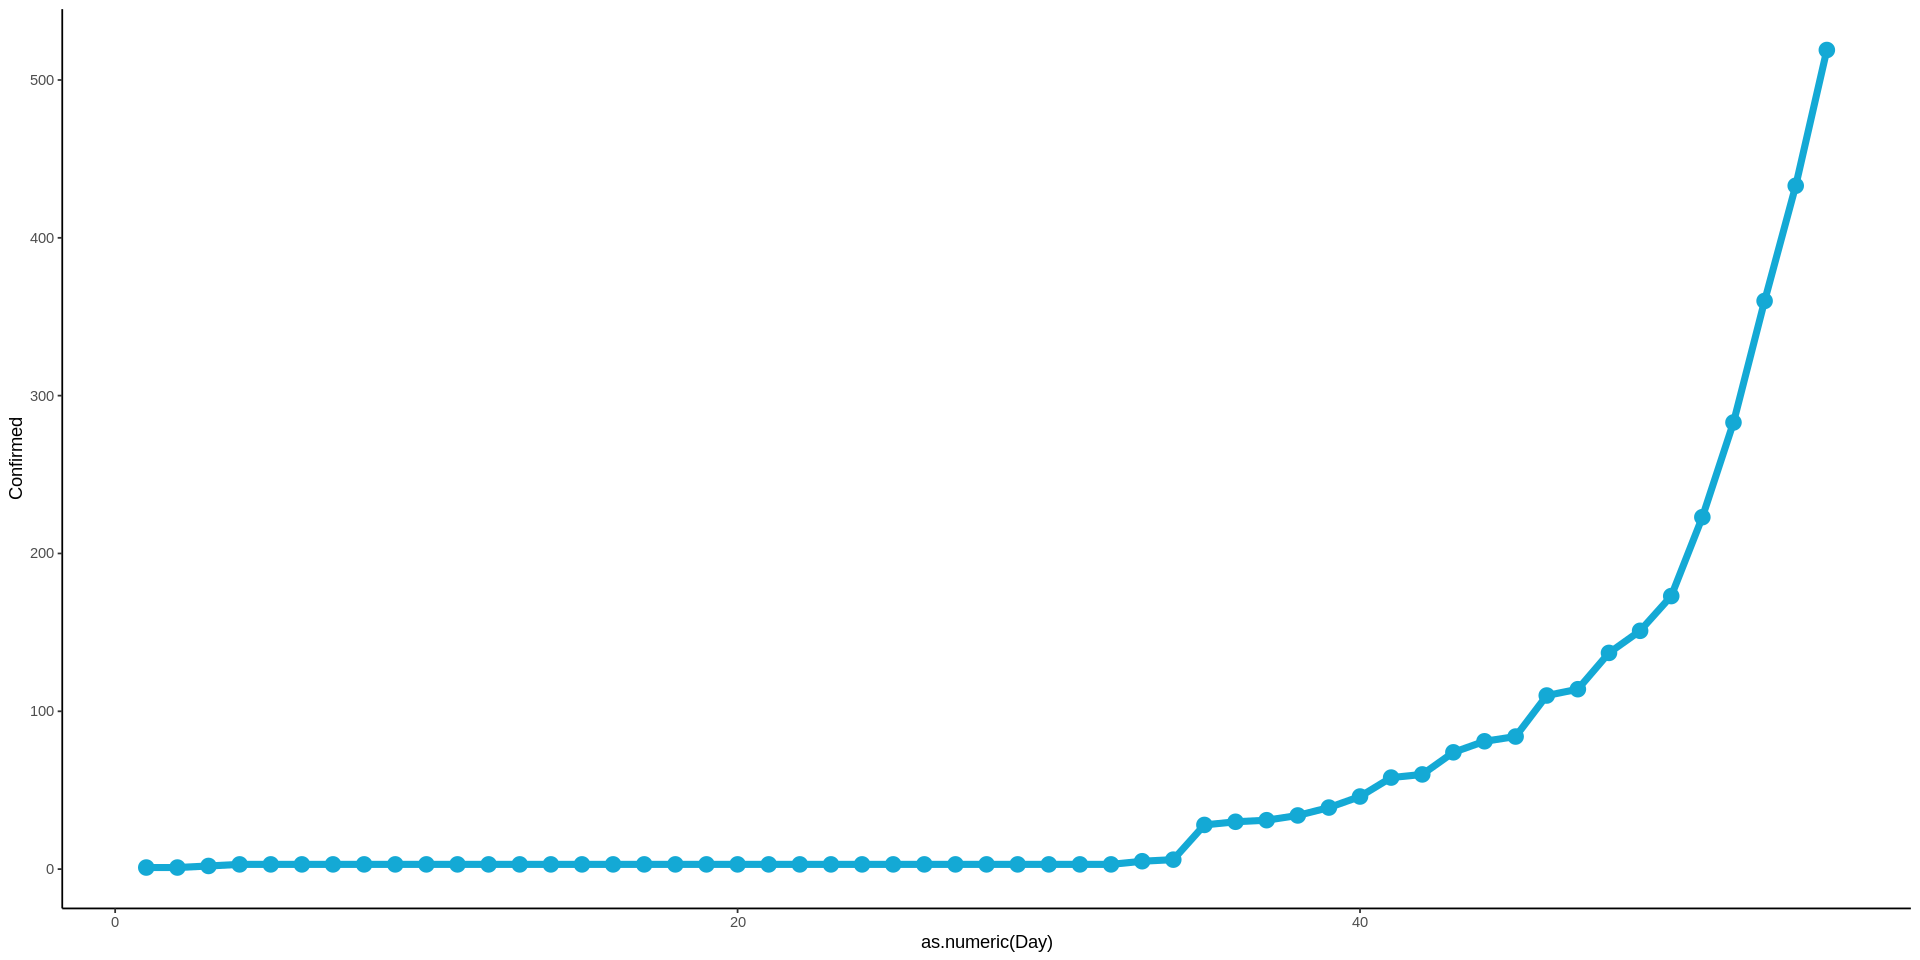

In [125]:
ggplot(india, aes(x=as.numeric(Day), y=Confirmed)) +
    geom_line(color = "#14a9d5", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#14a9d5", size=4)+
    theme_classic()

### New Cases over the days

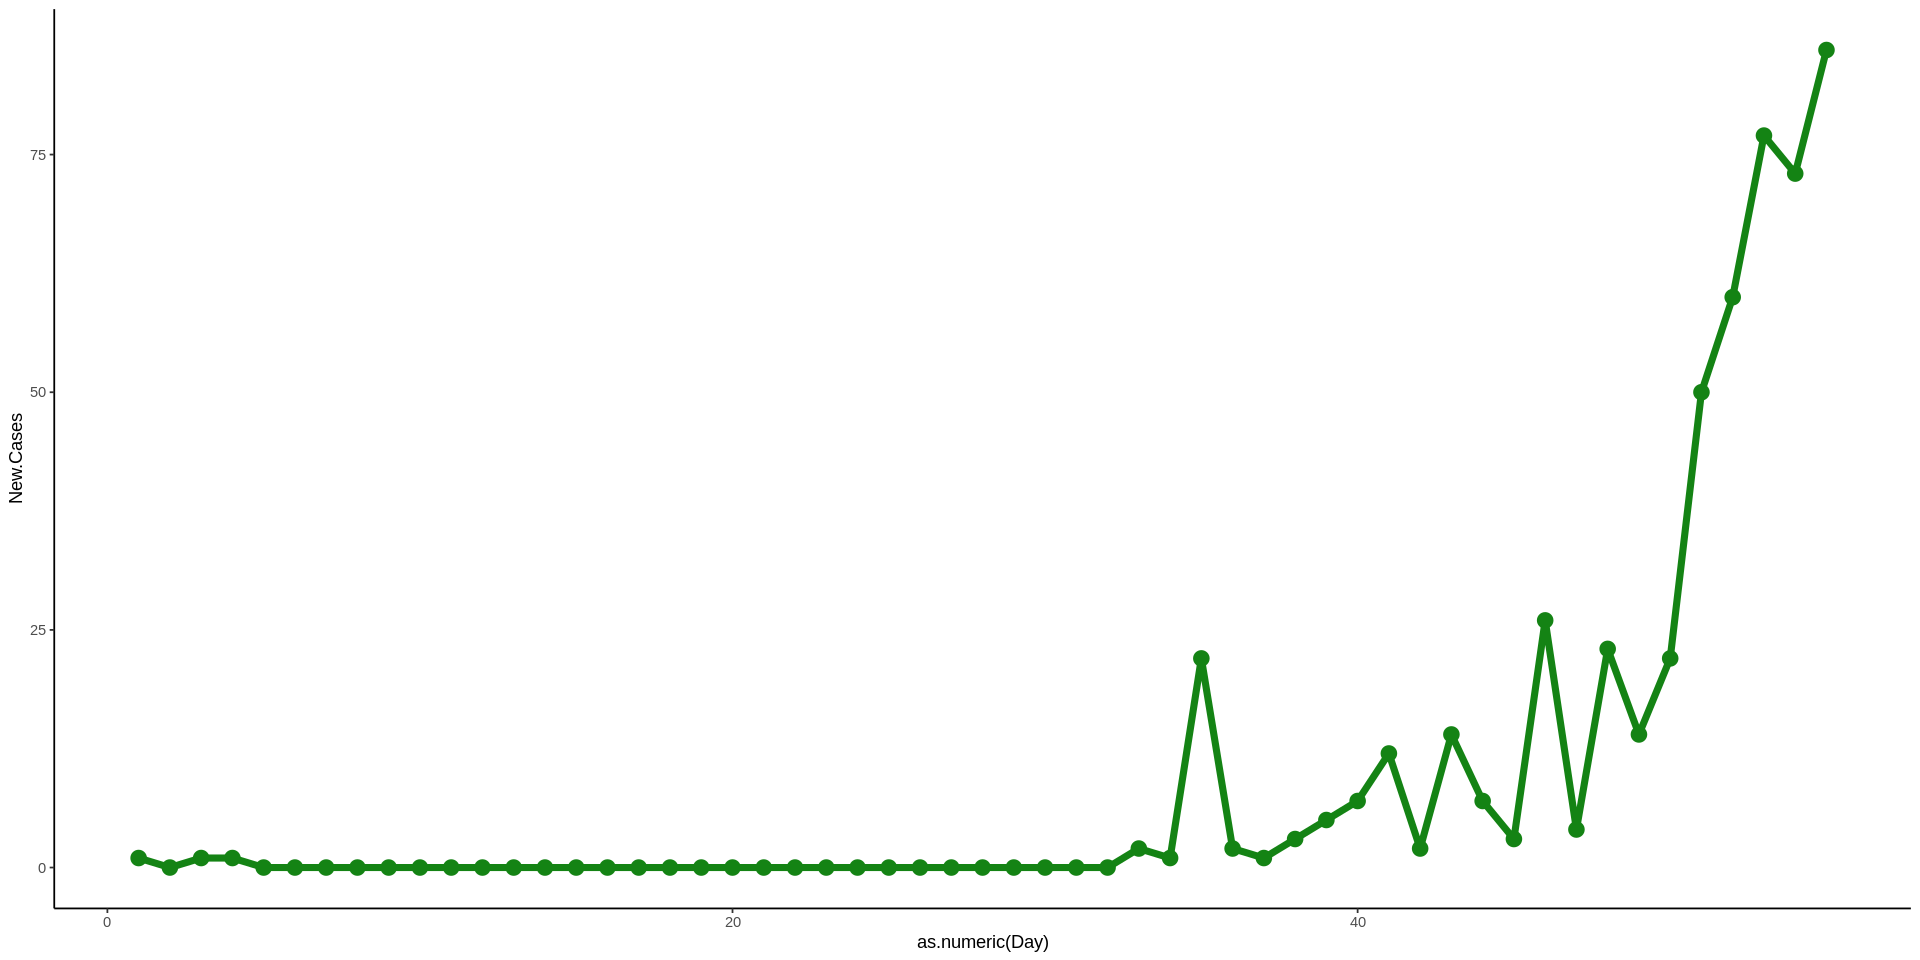

In [123]:
ggplot(india, aes(x=as.numeric(Day), y=New.Cases)) +
    geom_line(color = "#148314", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#148314", size=4)+
    theme_classic()

# Death Rate over the days

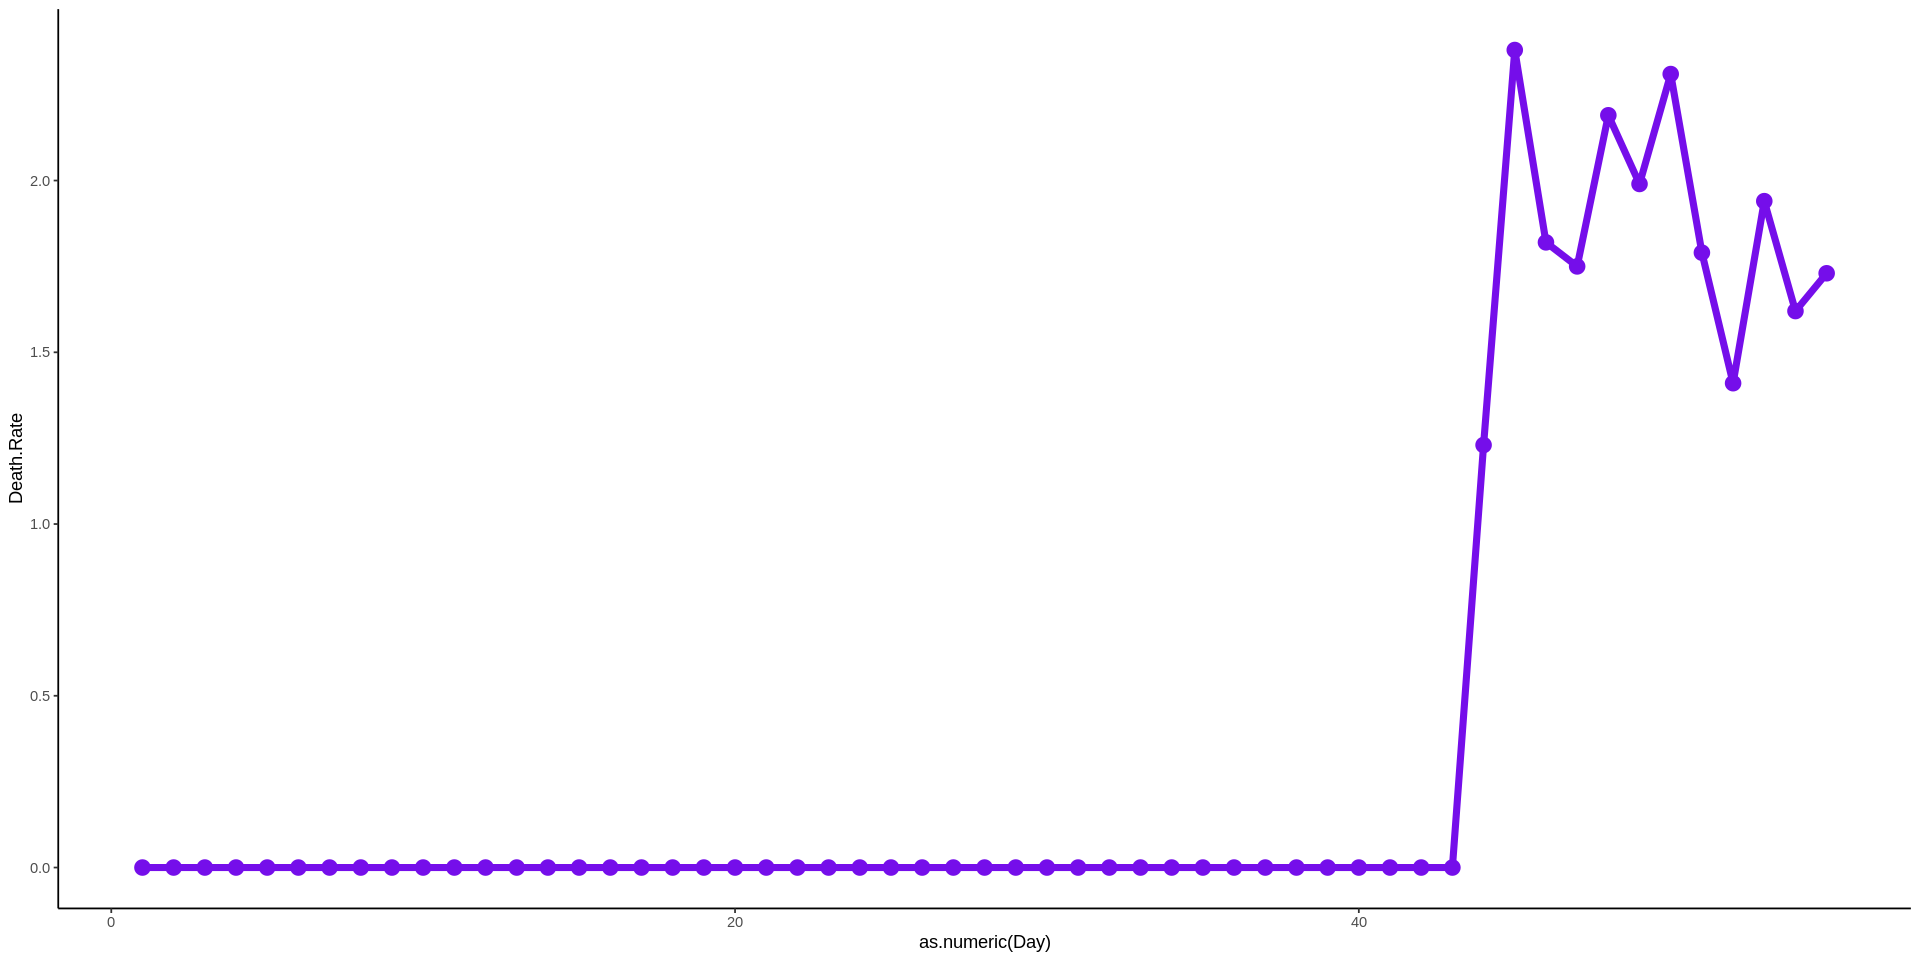

In [124]:
## death rate over the days
ggplot(india, aes(x=as.numeric(Day), y=Death.Rate)) +
    geom_line(color = "#750eea", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#750eea", size=4)+
    theme_classic()
    

<br />

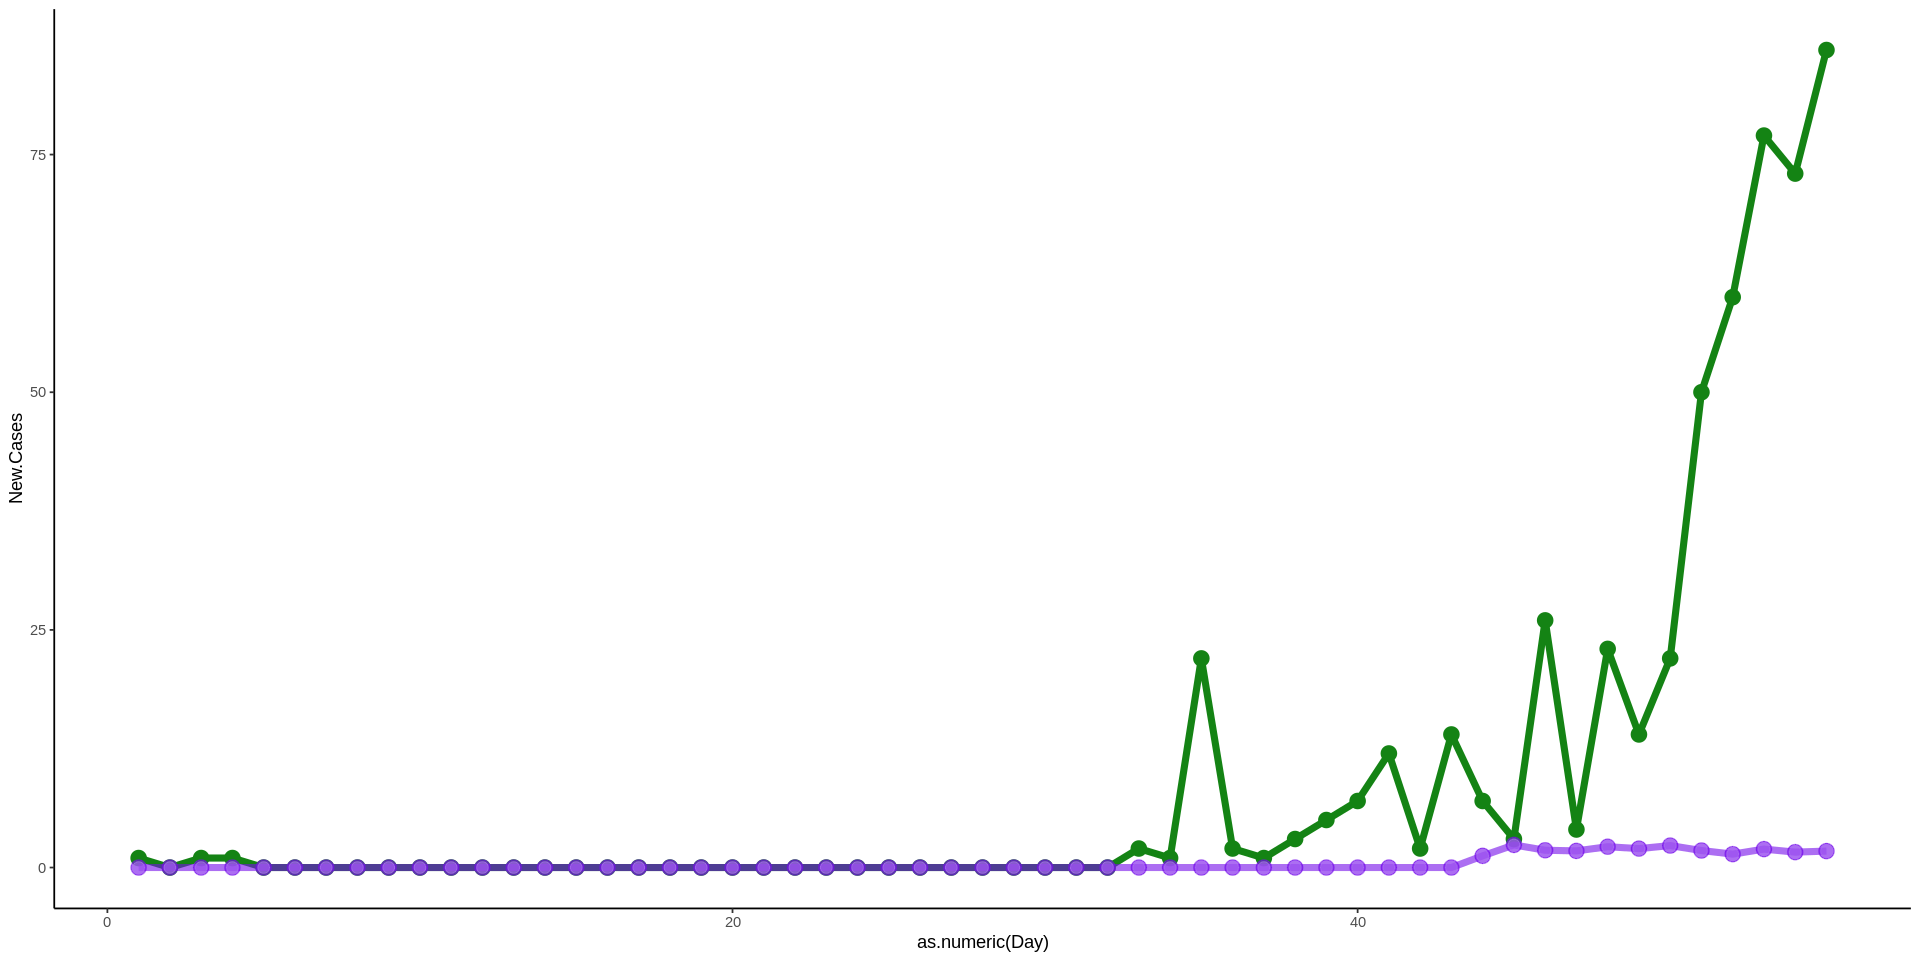

In [127]:
# merged
ggplot(india, aes(x=as.numeric(Day), y=New.Cases)) +
    geom_line(color = "#148314", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#148314", size=4) +

    geom_line(aes(y=Death.Rate), color = "#750eea", size=2, alpha = 0.6) +
    geom_point(aes(y=Death.Rate), color = "#ffffff", size=3, alpha = 0.6) +
    geom_point(aes(y=Death.Rate), color = "#750eea", size=4, alpha = 0.6) +
    theme_classic()

<br /><br />

## Histograms

In [91]:
theme_set(theme_classic())

In [92]:
days = as.numeric(india$Day)
#days

In [93]:
#### adding 
df = NULL

d = NULL
conf = NULL
for(day in days){
    d = c(d, rep(day, as.numeric(india$Confirmed[day])))
    conf = c(conf, rep(1, as.numeric(india$Confirmed[day])))
}

df = cbind(Day = d, Confirmed = conf)

In [94]:
df = as.data.frame(df)

In [95]:
head(df)

Day,Confirmed
1,1
2,1
3,1
3,1
4,1
4,1


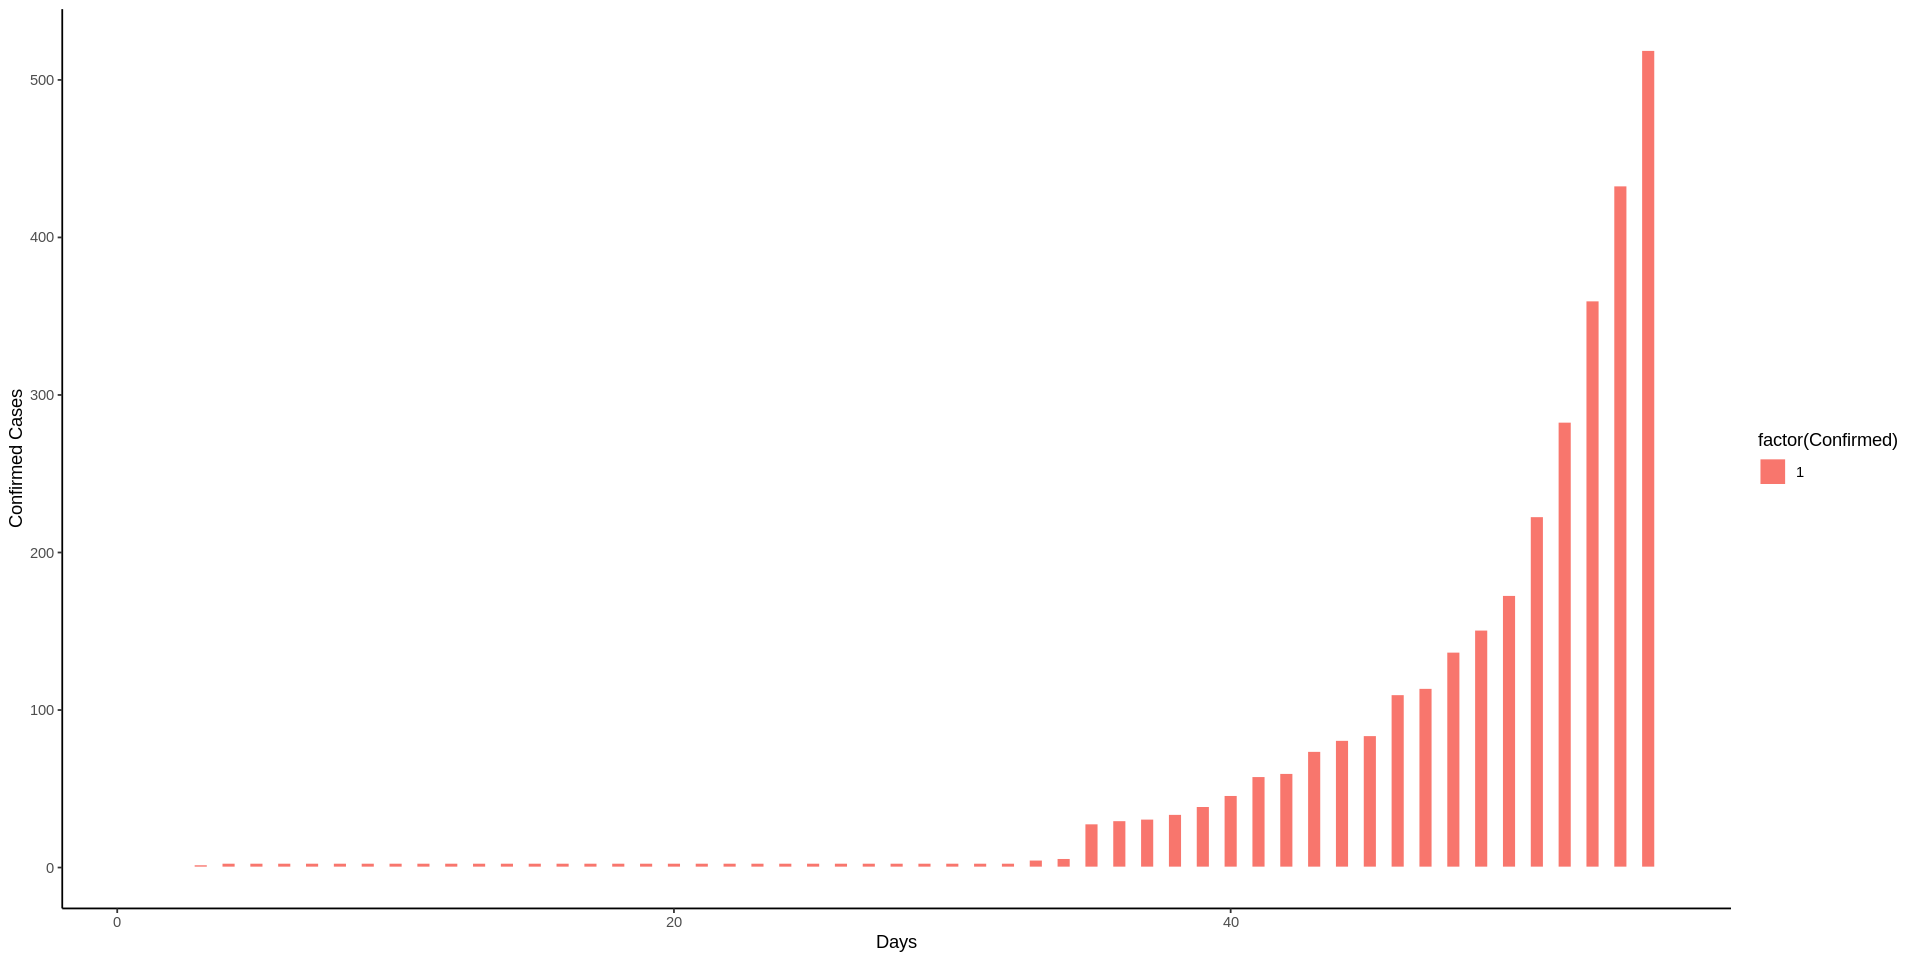

In [96]:
# Confirmed cases with Days
ggplot(df, aes(x = Day, fill = factor(Confirmed))) +
  geom_histogram(binwidth = 0.5, color ="white") +
  xlab("Days") +
  ylab("Confirmed Cases")

<br /><br />


In [97]:
## adding new cases

n = NULL
for(day in days){
    ones = as.numeric(india$New.Cases[day])
    zeros = as.numeric(india$Confirmed[day]) - as.numeric(india$New.Cases[day])
    
    #n = c(n, c(rep('New', ones), rep('Old', zeros)))
    n = c(n, c(rep(1, ones), rep(0, zeros)))
}

## 0: old cases
## 1: new cases

df = cbind(df, New = n)

In [98]:
head(df)

Day,Confirmed,New
1,1,1
2,1,0
3,1,1
3,1,0
4,1,1
4,1,0


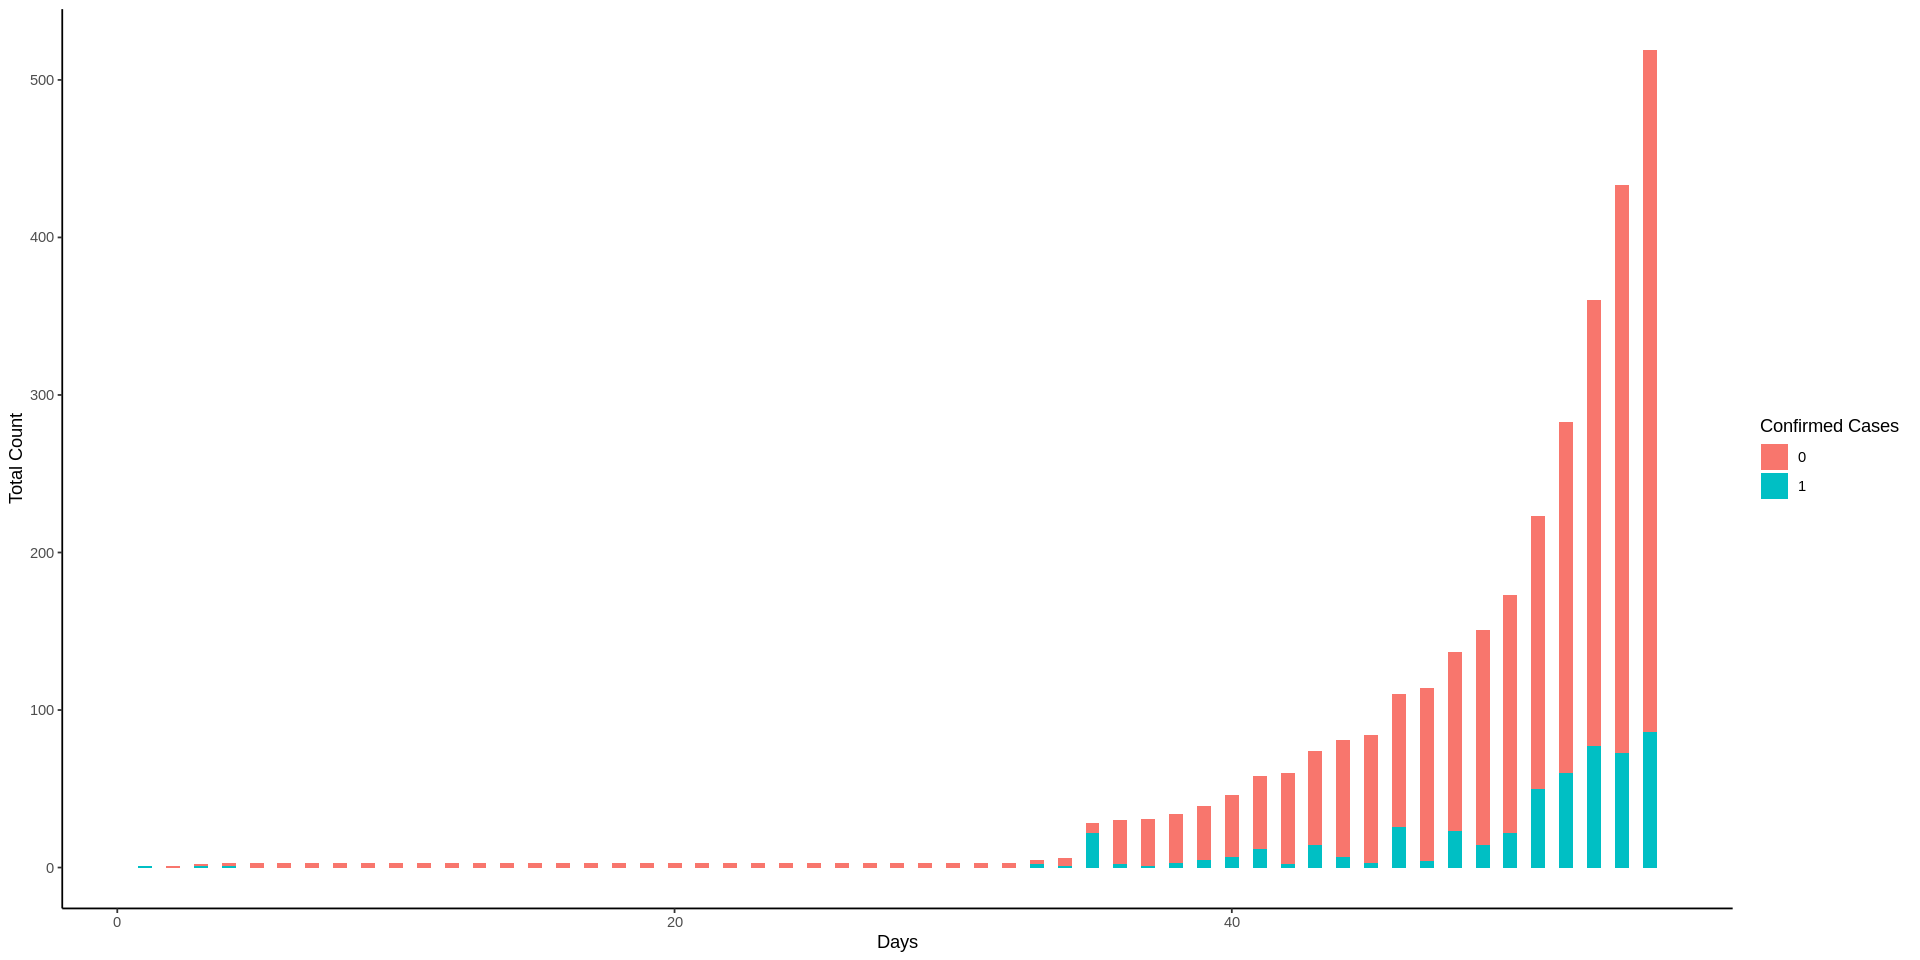

In [99]:
## days with old and new cases
ggplot(df, aes(x = Day, fill = factor(New))) +
  geom_histogram(binwidth = 0.5) +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br /><br />

In [100]:
## adding deaths

## 0: not dead
## 1: dead
d = NULL
for(day in days){
    ones = as.numeric(india$Deaths[day])
    zeros = as.numeric(india$Confirmed[day]) - as.numeric(india$Deaths[day])
    
    #d = c(d, c(rep('Died', ones), rep('Not Died', zeros)))
    d = c(d, c(rep(1, ones), rep(0, zeros)))
}

df = cbind(df, Deaths = d)

In [101]:
head(df)

Day,Confirmed,New,Deaths
1,1,1,0
2,1,0,0
3,1,1,0
3,1,0,0
4,1,1,0
4,1,0,0


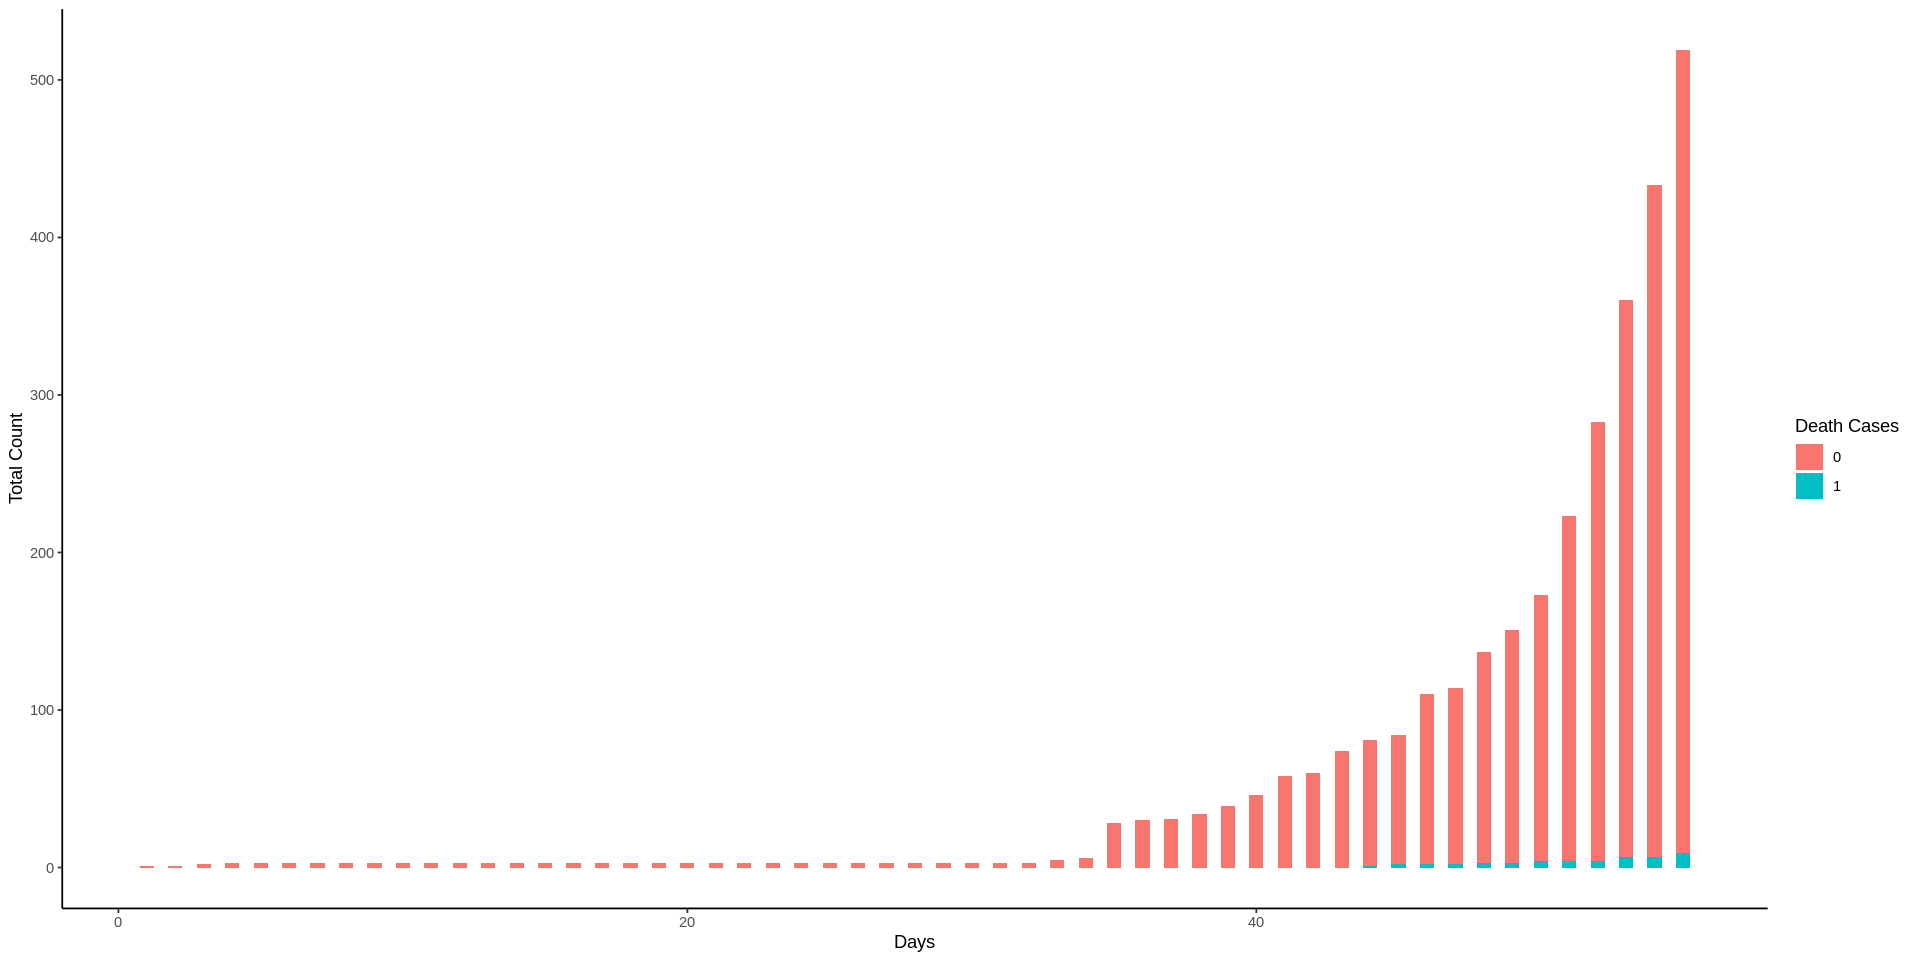

In [102]:
## days with deaths & confirmed
ggplot(df, aes(x = Day, fill = factor(Deaths))) +
  geom_histogram(binwidth = 0.5) +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Death Cases")

<br /><br />

In [103]:
## adding Recovered
r = NULL
for(day in days){
    ones = as.numeric(india$Recovered[day]) # recovered
    zeros = as.numeric(india$Confirmed[day]) - as.numeric(india$Recovered[day]) # not recovered
    
    #r = c(r, c(rep('Recovery', ones), rep('Not Recovered', zeros)))
    r = c(r, c(rep(1, ones), rep(0, zeros)))
}

df = cbind(df, Recovered = r)

In [104]:
head(df)

Day,Confirmed,New,Deaths,Recovered
1,1,1,0,0
2,1,0,0,0
3,1,1,0,0
3,1,0,0,0
4,1,1,0,0
4,1,0,0,0


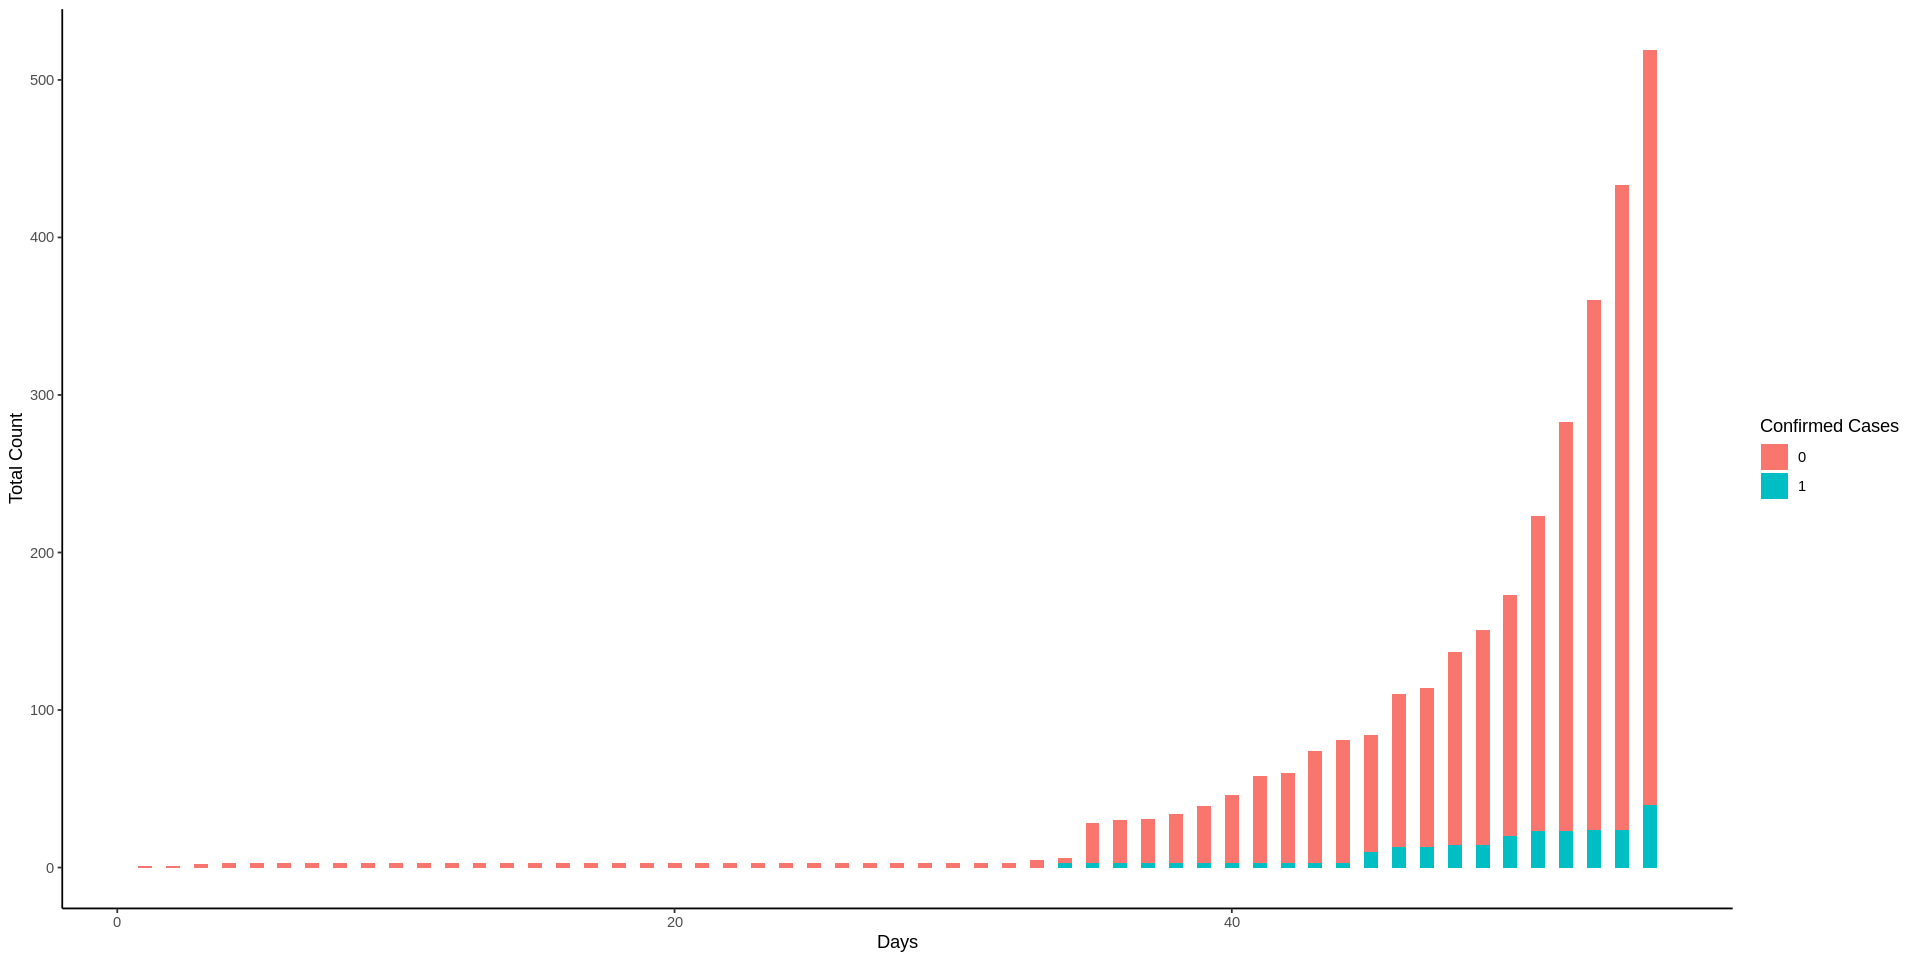

In [105]:
## days with recovered & confirmed
ggplot(df, aes(x = Day, fill = factor(Recovered))) +
  geom_histogram(binwidth = 0.5) +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br />

In [106]:
## adding case-status (Active/Closed)
s = NULL
for(day in days){
    ones = as.numeric(india$Active.Cases[day]) # active
    zeros = as.numeric(india$Closed.Cases[day]) # closed
    
    #s = c(s, c(rep('Active', ones), rep('Closed', zeros)))
    s = c(s, c(rep(1, ones), rep(0, zeros)))
}

df = cbind(df, Status = s)

In [107]:
head(df)

Day,Confirmed,New,Deaths,Recovered,Status
1,1,1,0,0,1
2,1,0,0,0,1
3,1,1,0,0,1
3,1,0,0,0,1
4,1,1,0,0,1
4,1,0,0,0,1


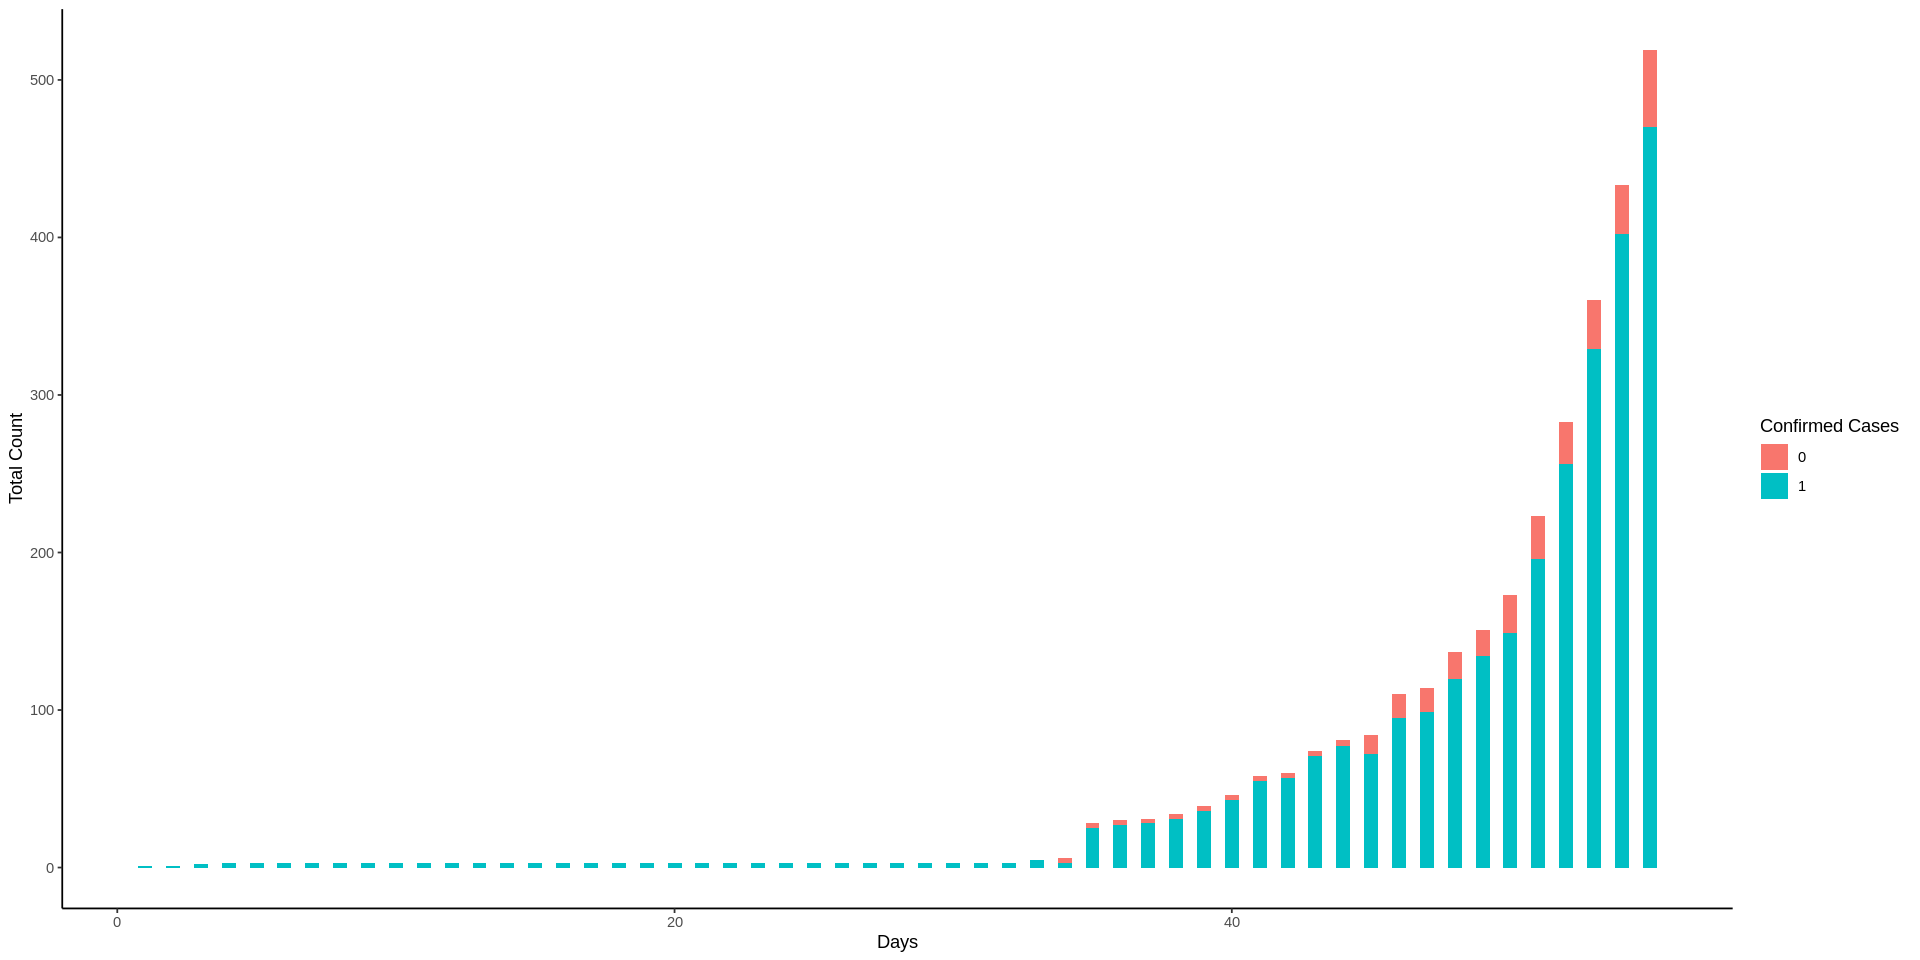

In [108]:
## days with status & confirmed
ggplot(df, aes(x = Day, fill = factor(Status))) +
  geom_histogram(binwidth = 0.5) +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br /><br />